In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
plt.style.use('fivethirtyeight')

In [2]:
inclusion_matrix = pd.read_csv('sp500_inclusion_matrix_20200303.csv')
inclusion_matrix.head()

,Unnamed: 0,A,AAL,AAP,AAPL,ABBV,ABC,ABK,ABMD,ABT,...,XOM,XRAY,XRX,XTO,XYL,YHOO,YUM,ZBH,ZION,ZTS
0,1957-01-01,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,1957-01-02,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,1957-01-03,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1957-01-04,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1957-01-07,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [3]:
inclusion_matrix = inclusion_matrix.rename(columns = {'Unnamed: 0': 'Date'})
inclusion_matrix.loc[:,'Date'] = pd.to_datetime(inclusion_matrix['Date'])
inclusion_matrix.set_index('Date', inplace = True)
inclusion_matrix.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABK,ABMD,ABT,ACAS,...,XOM,XRAY,XRX,XTO,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1957-01-01,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1957-01-02,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1957-01-03,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1957-01-04,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1957-01-07,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [106]:
shortened_inclusion_matrix = inclusion_matrix[pd.to_datetime('2007-01-01'):]
all_tickers = inclusion_matrix.columns
tickers_to_remove = []
for ticker in all_tickers:
    if np.sum(shortened_inclusion_matrix[ticker]) == 0:
        tickers_to_remove.append(ticker)
shortened_inclusion_matrix.drop(columns=tickers_to_remove, inplace=True)
shortened_inclusion_matrix.head()

/Users/shanetong/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,A,AAL,AAP,AAPL,ABBV,ABC,ABK,ABMD,ABT,ACN,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1,0,0,1,0,1,1,0,1,0,...,1,1,1,0,1,0,1,1,1,0
2007-01-02,1,0,0,1,0,1,1,0,1,0,...,1,1,1,0,1,0,1,1,1,0
2007-01-03,1,0,0,1,0,1,1,0,1,0,...,1,1,1,0,1,0,1,1,1,0
2007-01-04,1,0,0,1,0,1,1,0,1,0,...,1,1,1,0,1,0,1,1,1,0
2007-01-05,1,0,0,1,0,1,1,0,1,0,...,1,1,1,0,1,0,1,1,1,0


In [114]:
# get tickers and read history data
tickers = shortened_inclusion_matrix.columns
dates = shortened_inclusion_matrix.index
sp500_data_reader = pdr.data.YahooDailyReader(tickers, dates[0], dates[-1], retry_count=1)
sp500_df = sp500_data_reader.read()
sp500_df.head()

/Users/shanetong/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'CTL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/shanetong/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'CVC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/shanetong/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'DLPH', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/shanetong/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'ESV', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/shanetong/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'ETFC', replacing w

Attributes  Adj Close                                                  \
Symbols             A        AAL        AAP      AAPL ABBV        ABC   
Date                                                                    
2007-01-03  22.514685  53.076351  33.808624  2.577937  NaN  18.369146   
2007-01-04  22.586884  55.470905  34.027176  2.635158  NaN  18.440853   
2007-01-05  22.376839  54.952404  33.276501  2.616391  NaN  18.217766   
2007-01-08  22.298065  54.613022  33.390541  2.629312  NaN  18.504601   
2007-01-09  22.324327  54.584736  33.675583  2.847729  NaN  18.444841   

Attributes                                        ... Volume                   \
Symbols         ABK   ABMD        ABT        ACN  ...      Q RTN STI SYMC TSS   
Date                                              ...                           
2007-01-03  0.55550  14.05  16.620251  27.861742  ...    NaN NaN NaN  NaN NaN   
2007-01-04  0.55550  14.35  16.935896  28.489744  ...    NaN NaN NaN  NaN NaN   
2007-01-05  0.55550  14.14  16.935896  28.091499  ...    NaN NaN NaN  NaN NaN   
2007-01-08  0.59253  14.11  16.996986  28.497402  ...    NaN NaN NaN  NaN NaN   
2007-01-09  0.58513  13.96  17.146320  28.428469  ...    NaN NaN NaN  NaN NaN   

Attributes                        
Symbols    TYC UA-C UTX VIAB WCG  
Date                              
2007-01-03 NaN  NaN NaN  NaN NaN  
2007-01-04 NaN  NaN NaN  NaN NaN  
2007-01-05 NaN  NaN NaN  NaN NaN  
2007-01-08 NaN  NaN NaN  NaN NaN  
2007-01-09 NaN  NaN NaN  NaN NaN  

[5 rows x 3192 columns]

In [117]:
clean_sp500_df = sp500_df.dropna(axis=1)

In [118]:
clean_sp500_df.head()

Attributes  Adj Close                                                    \
Symbols             A        AAL        AAP      AAPL        ABC   ABMD   
Date                                                                      
2007-01-03  22.514685  53.076351  33.808624  2.577937  18.369146  14.05   
2007-01-04  22.586884  55.470905  34.027176  2.635158  18.440853  14.35   
2007-01-05  22.376839  54.952404  33.276501  2.616391  18.217766  14.14   
2007-01-08  22.298065  54.613022  33.390541  2.629312  18.504601  14.11   
2007-01-09  22.324327  54.584736  33.675583  2.847729  18.444841  13.96   

Attributes                                              ...     Volume  \
Symbols           ABT        ACN       ADBE        ADI  ...       WYNN   
Date                                                    ...              
2007-01-03  16.620251  27.861742  39.919998  22.638594  ...  1899300.0   
2007-01-04  16.935896  28.489744  40.820000  23.031525  ...  1073300.0   
2007-01-05  16.935896  28.091499  40.619999  22.769567  ...  1676600.0   
2007-01-08  16.996986  28.497402  40.450001  22.948803  ...  1809700.0   
2007-01-09  17.146320  28.428469  39.630001  22.914337  ...  1372700.0   

Attributes                                                                     \
Symbols           XEC        XEL       XLNX         XOM       XRAY        XRX   
Date                                                                            
2007-01-03  7583200.0  2613000.0  5954900.0  30510700.0  1209500.0  1522400.0   
2007-01-04  1347900.0  1503800.0  5823900.0  31046600.0  1048000.0  1106300.0   
2007-01-05  1188500.0  7920200.0  4911400.0  24671500.0   852700.0   860000.0   
2007-01-08  1137700.0  1337600.0  4251800.0  25981900.0   899000.0  1921000.0   
2007-01-09   872300.0  1456900.0  5365000.0  27039900.0   784200.0  1001600.0   

Attributes                                  
Symbols           YUM        ZBH      ZION  
Date                                        
2007-01-03  3281300.0  1792400.0  693400.0  
2007-01-04  2364900.0  2053000.0  569800.0  
2007-01-05  2265900.0  1220400.0  839200.0  
2007-01-08  3916700.0  1806100.0  621300.0  
2007-01-09  5366100.0  1170900.0  789800.0  

[5 rows x 2454 columns]

In [13]:
help(sp500_data_reader)

Help on YahooDailyReader in module pandas_datareader.yahoo.daily object:

class YahooDailyReader(pandas_datareader.base._DailyBaseReader)
 |  YahooDailyReader(symbols=None, start=None, end=None, retry_count=3, pause=0.1, session=None, adjust_price=False, ret_index=False, chunksize=1, interval='d', get_actions=False, adjust_dividends=True)
 |  
 |  Returns DataFrame of with historical over date range,
 |  start to end.
 |  To avoid being penalized by Yahoo! Finance servers, pauses between
 |  downloading 'chunks' of symbols can be specified.
 |  
 |  Parameters
 |  ----------
 |  symbols : string, array-like object (list, tuple, Series), or DataFrame
 |      Single stock symbol (ticker), array-like object of symbols or
 |      DataFrame with index containing stock symbols.
 |  start : string, int, date, datetime, Timestamp
 |      Starting date. Parses many different kind of date
 |      representations (e.g., 'JAN-01-2010', '1/1/10', 'Jan, 1, 1980'). Defaults to
 |      5 years before 

In [123]:
sp500_close_df = sp500_df['Adj Close']
clean_sp500_close_df = clean_sp500_df['Adj Close']
sp500_close_df.tail()

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABK,ABMD,ABT,ACN,...,Q,RTN,STI,SYMC,TSS,TYC,UA-C,UTX,VIAB,WCG
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-25,122.099998,20.860001,160.669998,120.989998,107.330002,102.849998,NaN,320.470001,121.580002,253.779999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-26,122.070000,20.940001,160.350006,121.260002,107.739998,101.220001,NaN,324.549988,119.779999,250.899994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,124.480003,21.180000,162.660004,127.790001,108.410004,103.169998,NaN,324.260010,122.209999,258.160004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,123.639999,21.440001,164.839996,125.120003,107.849998,104.250000,NaN,325.309998,122.529999,259.230011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-03,119.300003,22.170000,165.830002,122.059998,106.709999,103.339996,NaN,307.600006,119.180000,254.179993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
mom_df = sp500_close_df.pct_change(30)
mom_df
momAtDate = mom_df.loc[pd.to_datetime('2016-01-05'), ['A', 'AAPL', 'F']]
momAtDate.index

Index(['A', 'AAPL', 'F'], dtype='object', name='Symbols')

In [42]:
# get tickers and read history data
dates = shortened_inclusion_matrix.index
market_reader = pdr.data.YahooDailyReader('SPY', dates[0], dates[-1])
market_df = market_reader.read()
market_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-25,391.880005,380.779999,390.410004,382.329987,146670500.0,382.329987
2021-02-26,385.579987,378.230011,384.350006,380.359985,152534900.0,380.359985
2021-03-01,390.920013,380.570007,385.589996,389.579987,104945700.0,389.579987
2021-03-02,390.070007,386.000000,389.820007,386.540009,79389200.0,386.540009
2021-03-03,386.829987,381.309998,385.790009,381.420013,119482700.0,381.420013


In [43]:
market_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-25,391.880005,380.779999,390.410004,382.329987,146670500.0,382.329987
2021-02-26,385.579987,378.230011,384.350006,380.359985,152534900.0,380.359985
2021-03-01,390.920013,380.570007,385.589996,389.579987,104945700.0,389.579987
2021-03-02,390.070007,386.000000,389.820007,386.540009,79389200.0,386.540009
2021-03-03,386.829987,381.309998,385.790009,381.420013,119482700.0,381.420013


In [46]:
market_close_df = market_df['Adj Close']
market_vol = market_close_df.pct_change().rolling(30).std()

In [49]:
market_vol['2021-03-01']

0.010953307698533234

In [150]:
def momemtum_mean_reversion(stocks_close_df, market_close_df, inclusionMatrix, n=30, mom_select=5, mean_select=10, vol_thres=0.020, freq='BQ'):
    momentum = sp500_close_df.pct_change(n)
    market_vol = market_close_df.pct_change().rolling(n).std()
    
    selection = stocks_close_df.copy()
    selection.iloc[:,:] = 0.0
    dates = list(stocks_close_df.index)
    tickers = inclusionMatrix.columns
    rebalDates = pd.date_range(start=dates[0], end=dates[-1], freq=freq)
    
    for index, date in enumerate(dates):
        if date in rebalDates:
            includedAtDate = inclusionMatrix.loc[date,:].values
            tkrsAtDate = [tk for tk, incl in zip(tickers, includedAtDate) if incl]
            try:
                momAtDate = momentum.loc[dates[index-1], tkrsAtDate]
                vol = market_vol[dates[index-1]]
            except KeyError:
                continue
            if vol > vol_thres:
                selected = momAtDate.sort_values(ascending=False).iloc[:mom_select].index.tolist()
                selection.loc[date, selected] += float(1/mom_select)
            else:
                selected = momAtDate.sort_values(ascending=True).iloc[:mom_select].index.tolist()
                selection.loc[date, selected] += float(1/mom_select)
#         else:
#             if date - pd.to_timedelta(1, unit='d') in dates:
#                 selection.loc[date, :] = selection.loc[date-pd.to_timedelta(1, unit='d'),:]
#             elif date - pd.to_timedelta(2, unit='d') in dates:
#                 selection.loc[date, :] = selection.loc[date-pd.to_timedelta(2, unit='d'),:]
#             elif date - pd.to_timedelta(3, unit='d') in dates:
#                 selection.loc[date, :] = selection.loc[date-pd.to_timedelta(3, unit='d'),:]
    notAllZeros = (selection.sum(axis=1)!=0.0).values
    idxToDrop = [selection.index.tolist()[i] for i in range(len(notAllZeros)) if notAllZeros[i]==False]
    selection.drop(idxToDrop, axis=0, inplace=True)
    
    return selection

In [151]:
selection = momemtum_mean_reversion(sp500_close_df, market_close_df, shortened_inclusion_matrix)

In [75]:
selection.shape

(58, 532)

In [67]:
list(selection.index)

[Timestamp('2006-01-03 00:00:00'),
 Timestamp('2006-01-04 00:00:00'),
 Timestamp('2006-01-05 00:00:00'),
 Timestamp('2006-01-06 00:00:00'),
 Timestamp('2006-01-09 00:00:00'),
 Timestamp('2006-01-10 00:00:00'),
 Timestamp('2006-01-11 00:00:00'),
 Timestamp('2006-01-12 00:00:00'),
 Timestamp('2006-01-13 00:00:00'),
 Timestamp('2006-01-17 00:00:00'),
 Timestamp('2006-01-18 00:00:00'),
 Timestamp('2006-01-19 00:00:00'),
 Timestamp('2006-01-20 00:00:00'),
 Timestamp('2006-01-23 00:00:00'),
 Timestamp('2006-01-24 00:00:00'),
 Timestamp('2006-01-25 00:00:00'),
 Timestamp('2006-01-26 00:00:00'),
 Timestamp('2006-01-27 00:00:00'),
 Timestamp('2006-01-30 00:00:00'),
 Timestamp('2006-01-31 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-02 00:00:00'),
 Timestamp('2006-02-03 00:00:00'),
 Timestamp('2006-02-06 00:00:00'),
 Timestamp('2006-02-07 00:00:00'),
 Timestamp('2006-02-08 00:00:00'),
 Timestamp('2006-02-09 00:00:00'),
 Timestamp('2006-02-10 00:00:00'),
 Timestamp('2006-02-

In [152]:
def backtest(selection, stocks_close_df, market_close_df):
    
    rebalDates = list(selection.index)
    dates = list(stocks_close_df.index)
    total_returns = []
    total_return = 1
    market_returns = []
    market_return = 1
    port_shares = None
    
    cleaned_stocks_close_df = stocks_close_df.fillna(1, inplace=False)
    
    for index, date in enumerate(dates):
        if date in rebalDates:
            port_shares = (selection.loc[date,:].values * total_return)/cleaned_stocks_close_df.loc[date,:].values
        if index != 0 and port_shares is not None:
            port_val_today = np.dot(cleaned_stocks_close_df.loc[date,:].values, port_shares)
            port_val_prev = np.dot(cleaned_stocks_close_df.loc[dates[index-1],:].values, port_shares)
            total_return *= (port_val_today/port_val_prev)
            total_returns.append(total_return)
            
            
            market_val_today = market_close_df.loc[date]
            market_val_prev = market_close_df.loc[dates[index-1]]
            market_return *= (market_val_today/market_val_prev)
            market_returns.append(market_return)
        else:
            total_returns.append(total_return)
            market_returns.append(market_return)
    
    total_returns = np.array(total_returns) * 100
    market_returns = np.array(market_returns) * 100
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.plot(dates, total_returns, label='Portfolio Return')
    ax.plot(dates, market_returns, label='SP500 Return')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Return %')
    

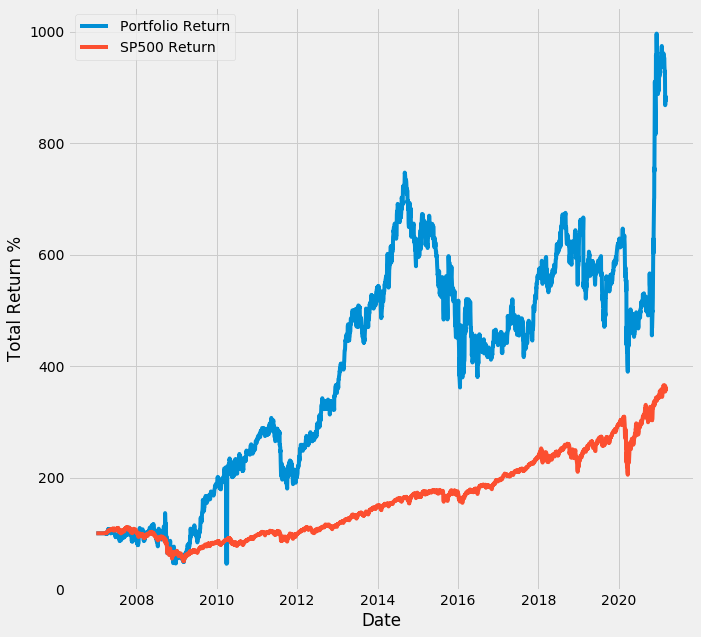

In [153]:
backtest(selection, sp500_close_df, market_close_df)